In [1]:
import ctypes
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
with open("../src/model_ctypes/_ohara_rudy/ohara_rudy.c") as f:
    lines = f.readlines()[10:514]
    
lines[:5]

[' * VOI is time in component environment (millisecond).\n',
 ' * CONSTANTS[0] is celltype in component environment (dimensionless).\n',
 ' * CONSTANTS[1] is nao in component extracellular (millimolar).\n',
 ' * CONSTANTS[2] is cao in component extracellular (millimolar).\n',
 ' * CONSTANTS[3] is ko in component extracellular (millimolar).\n']

In [4]:
prefixes = ['CONSTANTS', 'STATES', 'ALGEBRAIC']
result = {p: [] for p in prefixes}

for line in lines:
    
    line = line.split()[1:]
    
    x = line[0]
    
    for p in result:
        if x.startswith(p):
            n = int(x[len(p) + 1:-1])
            what = line[2]
            where = line[5]
            units = line[6][1:-2]
            result[p].append([n, what, where, units])

In [5]:
for p, x in result.items():
    result[p] = sorted(x, key = lambda x: x[0])

In [6]:
legend_constants = pd.DataFrame(result['CONSTANTS'], columns=['index', 'name', 'component', 'units']).set_index('index')
legend_constants['value'] = None
legend_constants.head()

,name,component,units,value
index,,,,
0,celltype,environment,dimensionless,None
1,nao,extracellular,millimolar,None
2,cao,extracellular,millimolar,None
3,ko,extracellular,millimolar,None
4,R,physical_constants,joule_per_kilomole_kelvin,None


In [7]:
legend_states = pd.DataFrame(result['STATES'], columns=['index', 'name', 'component', 'units']).set_index('index')
legend_states['value'] = None
legend_states.head()

,name,component,units,value
index,,,,
0,v,membrane,millivolt,None
1,CaMKt,CaMK,millimolar,None
2,cass,intracellular_ions,millimolar,None
3,nai,intracellular_ions,millimolar,None
4,nass,intracellular_ions,millimolar,None


In [8]:
legend_algebraic = pd.DataFrame(result['ALGEBRAIC'], columns=['index', 'name', 'component', 'units']).set_index('index')
legend_algebraic['value'] = 0
legend_algebraic.head()

,name,component,units,value
index,,,,
0,Istim,membrane,microA_per_microF,0
1,mss,INa,dimensionless,0
2,hss,INa,dimensionless,0
3,hLss,INaL,dimensionless,0
4,hLssp,INaL,dimensionless,0


# MAIN

In [2]:
import ctypes
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
dirname = '../src/model_ctypes/_ohara_rudy/'
filename_so = os.path.join(dirname, 'model.so')

filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')
]
model.run.restype = ctypes.c_int


model.run_chain.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')
]

model.run_chain.restype = ctypes.c_int


legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']
legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')

In [4]:
# model.initConsts.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.initConsts.restype = ctypes.c_void_p


# values1 = np.zeros(len(legend_constants))
# values2 = np.zeros(len(legend_states))

# model.initConsts(values1, values2)
# legend_constants['value'] = values1
# legend_states['value'] = values2

In [5]:
# legend_constants[['name', 'value', 'units', 'component']].to_csv(os.path.join(dirname, "legend_constants.csv"), index=False)
# legend_states[['name', 'value', 'units', 'component']].to_csv(os.path.join(dirname, "legend_states.csv"), index=False)
# legend_algebraic[['name', 'value', 'units', 'component']].to_csv(os.path.join(dirname, "legend_algebraic.csv"), index=False)

In [6]:
S = legend_states.copy()
C = legend_constants.copy()
A = legend_algebraic.copy()

In [6]:
S.reset_index()

,name,value
0,v,-8.800190e+01
1,CaMKt,1.258404e-02
2,cass,8.490000e-05
3,nai,7.268004e+00
4,nass,7.268090e+00
5,ki,1.446556e+02
6,kss,1.446556e+02
7,cansr,1.619575e+00
8,cajsr,1.571234e+00
9,cai,8.600000e-05


In [7]:
C['i_Stim_Amplitude'] = -120 # -160
C['i_Stim_PulseDuration'] = 1
#C['amplitude'] = -60 # legend_constants['amplitude'] * 5

In [8]:
t_sampling = 1

C['i_Stim_Period'] = 1000
stim_period = C['i_Stim_Period']
n_samples_per_stim = int(stim_period / t_sampling)

n_beats = 1
tol = 1e-6

chain_length = 30
v_threshold = 1e-1
t_safe = 10

output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
# output_A = np.zeros((n_samples_per_stim * n_beats + 1, len(A)))
# t = np.zeros(n_samples_per_stim * n_beats + 1)

In [8]:
output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))

status = model.run(S.values.copy(), C.values.copy(),
                   n_beats, t_sampling, tol, output)

print(status)

2


In [9]:
output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))

status = model.run_chain(S.values.copy(), C.values.copy(),
                         chain_length, v_threshold, t_safe,
                         n_beats, t_sampling, tol, output)

print(status)

2


In [10]:
output = pd.DataFrame(output, columns=legend_states.index)
# output_A = pd.DataFrame(output_A, columns=legend_algebraic.index)

In [11]:
err_abs = output.iloc[-1] - output.iloc[0]
err_rel = err_abs / output.iloc[0] * 100

items = ['nai', 'ki', 'v', 'cai']
# items = ['Nai', 'Ki']

df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                     index=['err_rel', 'err_abs'])
df_err

name,nai,ki,v,cai
err_rel,0.107784,-0.003588,-0.080982,1.229354
err_abs,0.007834,-0.005190,0.071266,0.000001


In [12]:
output

name,v,CaMKt,cass,nai,nass,ki,kss,cansr,cajsr,cai,...,IO,IObound,Obound,Cbound,D,xs1,xs2,xk1,Jrelnp,Jrelp
0,-88.001905,0.012584,0.000085,7.268004,7.268090,144.655592,144.655565,1.619575,1.571234,0.000086,...,0.000057,0.0,0.0,0.0,0.0,0.270776,0.000193,0.996760,2.500000e-07,3.120000e-07
1,-87.983838,0.012578,0.000085,7.267993,7.268078,144.655606,144.655579,1.619561,1.571433,0.000086,...,0.000057,0.0,0.0,0.0,0.0,0.270646,0.000193,0.996760,2.504078e-07,3.124939e-07
2,-87.958129,0.012571,0.000085,7.267982,7.268067,144.655620,144.655593,1.619547,1.571631,0.000086,...,0.000057,0.0,0.0,0.0,0.0,0.270517,0.000193,0.996760,2.509123e-07,3.130886e-07
3,-87.831265,0.012564,0.000085,7.267970,7.268055,144.655633,144.655606,1.619534,1.571828,0.000086,...,0.000057,0.0,0.0,0.0,0.0,0.270388,0.000193,0.996762,2.517079e-07,3.139843e-07
4,-87.255600,0.012558,0.000085,7.267958,7.268044,144.655641,144.655619,1.619521,1.572025,0.000086,...,0.000057,0.0,0.0,0.0,0.0,0.270259,0.000193,0.996769,2.540692e-07,3.164845e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-87.930315,0.013972,0.000086,7.275884,7.275972,144.650348,144.650321,1.610272,1.523302,0.000087,...,0.000058,0.0,0.0,0.0,0.0,0.273106,0.000194,0.996778,2.286324e-07,2.854794e-07
997,-87.930396,0.013965,0.000086,7.275872,7.275960,144.650361,144.650335,1.610240,1.523652,0.000087,...,0.000058,0.0,0.0,0.0,0.0,0.272976,0.000194,0.996778,2.288378e-07,2.857376e-07
998,-87.930478,0.013958,0.000086,7.275861,7.275949,144.650375,144.650348,1.610208,1.524000,0.000087,...,0.000058,0.0,0.0,0.0,0.0,0.272845,0.000194,0.996778,2.290424e-07,2.859946e-07
999,-87.930559,0.013951,0.000086,7.275850,7.275937,144.650388,144.650361,1.610176,1.524347,0.000087,...,0.000058,0.0,0.0,0.0,0.0,0.272715,0.000194,0.996778,2.292460e-07,2.862505e-07


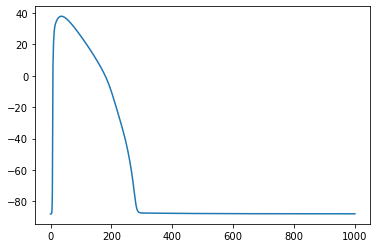

In [13]:
plt.plot(output.v)

In [14]:
atol = (output.abs().min() / 10).clip(lower=1e-6, upper=1e-3)
atol = np.power(10, np.log10(atol).round())

s = ""
for i, name in enumerate(atol.index):
    x = f'/*{name}*/ {atol[name]}, '
    s += x
    s += (20 - len(x)) * ' '
    if i % 5 == 4:
        s += '\n'

In [15]:
print(s)

/*v*/ 0.001,        /*CaMKt*/ 0.001,    /*cass*/ 1e-05,     /*nai*/ 0.001,      /*nass*/ 0.001,     
/*ki*/ 0.001,       /*kss*/ 0.001,      /*cansr*/ 0.001,    /*cajsr*/ 0.001,    /*cai*/ 1e-05,      
/*m*/ 0.001,        /*hf*/ 1e-06,       /*hs*/ 1e-06,       /*j*/ 1e-06,        /*hsp*/ 1e-06,      
/*jp*/ 1e-06,       /*mL*/ 1e-05,       /*hL*/ 0.001,       /*hLp*/ 0.001,      /*a*/ 0.0001,       
/*iF*/ 1e-06,       /*iS*/ 0.0001,      /*ap*/ 0.0001,      /*iFp*/ 1e-06,      /*iSp*/ 0.001,      
/*d*/ 1e-06,        /*ff*/ 1e-06,       /*fs*/ 0.001,       /*fcaf*/ 1e-06,     /*fcas*/ 0.001,     
/*jca*/ 0.001,      /*ffp*/ 0.0001,     /*fcafp*/ 0.0001,   /*nca*/ 0.0001,     /*IC1*/ 1e-06,      
/*IC2*/ 1e-05,      /*C1*/ 1e-06,       /*C2*/ 1e-05,       /*O*/ 1e-05,        /*IO*/ 1e-05,       
/*IObound*/ 1e-06,  /*Obound*/ 1e-06,   /*Cbound*/ 1e-06,   /*D*/ 1e-06,        /*xs1*/ 0.001,      
/*xs2*/ 1e-05,      /*xk1*/ 0.001,      /*Jrelnp*/ 1e-06,   /*Jrelp*/ 1e-06,    


# Syn

In [18]:
from tqdm.auto import tqdm

In [45]:
t_sampling = 1


for stim_period in tqdm([2000, 1000, 666, 500, 333, 250]):
    
    C['i_Stim_Period'] = stim_period
    n_samples_per_stim = int(stim_period / t_sampling)

    n_beats = 100
    tol = 1e-3

    output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
    # output_A = np.zeros((n_samples_per_stim * n_beats + 1, len(A)))
    # t = np.zeros(n_samples_per_stim * n_beats + 1)
    
#     status = model.run(S.values.copy(), C.values.copy(),
#                    n_beats, t_sampling, tol, output)
    
    chain_length = 30
    v_threshold = 1e-1
    t_safe = 10
    status = model.run_chain(S.values.copy(), C.values.copy(),
                             chain_length, v_threshold, t_safe,
                             n_beats, t_sampling, tol, output)

    print(status)
    
    output = pd.DataFrame(output, columns=legend_states.index)

    phenotype = output[-stim_period - 1:][:1000]
    state = phenotype.iloc[0]
    
    dirname = "../data/ohara_rudy/syn/"
    
    phenotype_filename = os.path.join(dirname, f'phenotypes/phenotype_{stim_period}.csv')
    state_filename = os.path.join(dirname, f'states/state_{stim_period}.txt')
    
    phenotype.to_csv(phenotype_filename, index=False)
    np.savetxt(state_filename, state)

  0%|          | 0/6 [00:00<?, ?it/s]

2
2
2
2
2
2


  0%|          | 0/6 [00:00<?, ?it/s]

nai        6.858441
ki       145.100828
v        -87.967561
cansr      1.397624
Name: 999, dtype: float64
nai        7.581296
ki       144.342086
v        -87.928653
cansr      1.538725
Name: 999, dtype: float64
nai        7.864367
ki       144.008099
v        -87.874159
cansr      1.813208
Name: 666, dtype: float64
nai        7.956764
ki       143.850313
v        -87.814126
cansr      2.189988
Name: 500, dtype: float64
nai        7.934893
ki       143.765146
v        -87.631686
cansr      2.842796
Name: 333, dtype: float64
nai        7.632935
ki       144.201062
v        -87.828787
cansr      2.063750
Name: 250, dtype: float64


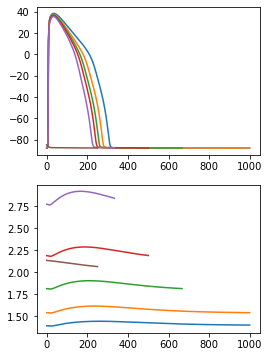

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=plt.figaspect(1.5))

for stim_period in tqdm([2000, 1000, 666, 500, 333, 250]):
    
    dirname = "../data/ohara_rudy/syn/"
    phenotype_filename = os.path.join(dirname, f'phenotypes/phenotype_{stim_period}.csv')
    df = pd.read_csv(phenotype_filename)
    
    axes[0].plot(df.v)
    axes[1].plot(df.cansr)
    
    print(df.iloc[-1][['nai', 'ki', 'v', 'cansr']])

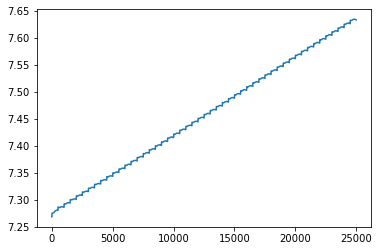

In [50]:
plt.plot(output.nai)